In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline

In [32]:
# Importacao da planilha de cervejas
cerveja = pd.read_excel("Cerveja_Multicolinearidade.xlsx", parse_dates=["Data"])

In [33]:
# Verificando o Dataframe "cerveja"
cerveja.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0,25461
1,2015-01-02,27.02,24.5,33.5,0.0,0,28972
2,2015-01-03,24.82,22.4,29.9,0.0,1,30814
3,2015-01-04,23.98,21.5,28.6,1.2,1,29799
4,2015-01-05,23.82,21.0,28.3,0.0,0,28900


In [34]:
# Nome de todas as colunas (variáveis) do Dataframe
cerveja.columns

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

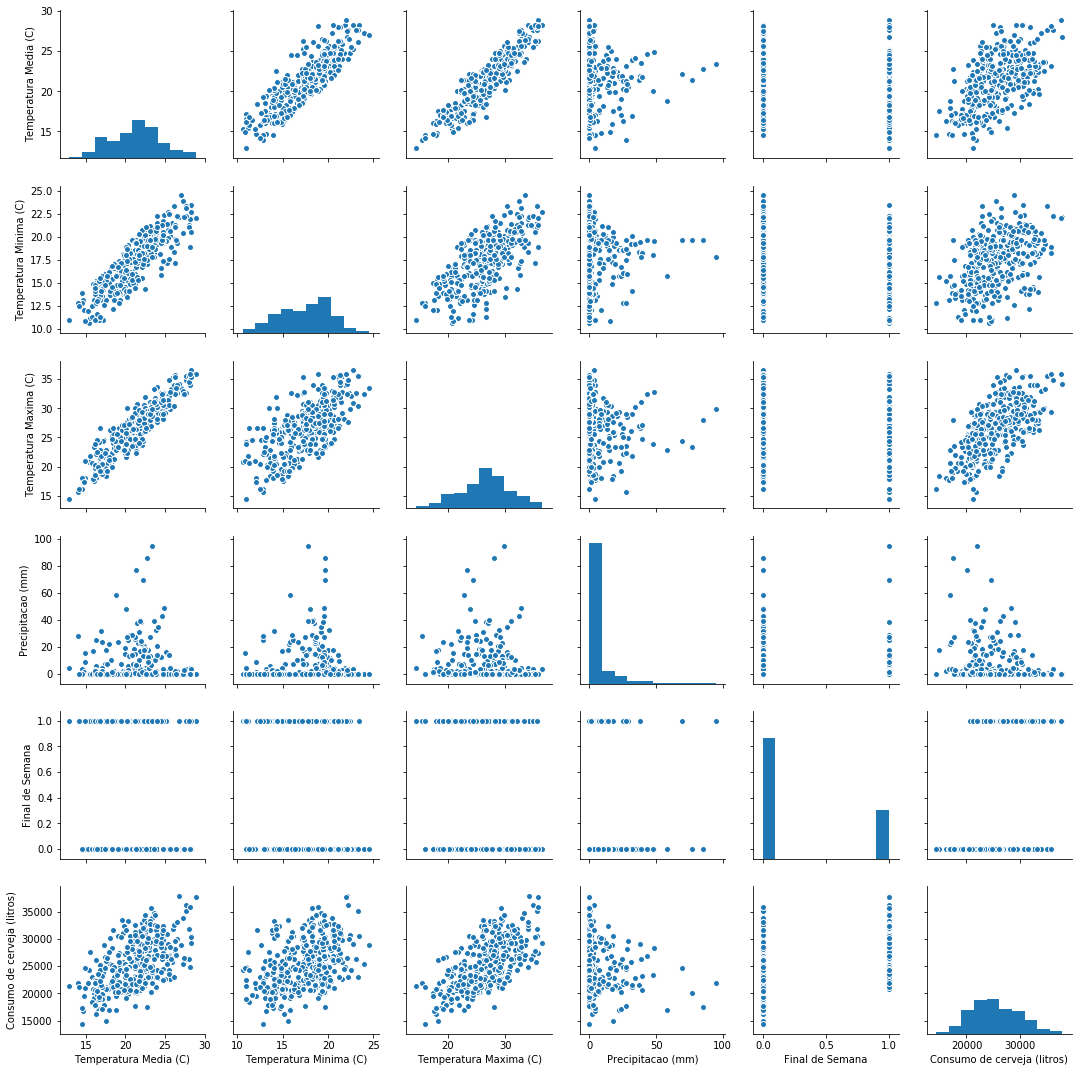

In [35]:
# Plots para verficar a correlação entre as variáveis.
sns.pairplot(data=cerveja)

In [36]:
# Convertendo o tipo de STR para Date
cerveja["Data"] = pd.to_datetime(cerveja["Data"])

In [37]:
#Verificando a correlação entre as variáveis
#A temperatura Max tem 0,64 de CORR. Abaixo será plotado gráfico para facilitar a visualiação
cerveja.corr()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
Temperatura Media (C),1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
Temperatura Minima (C),0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
Temperatura Maxima (C),0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
Precipitacao (mm),0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
Final de Semana,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
Consumo de cerveja (litros),0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


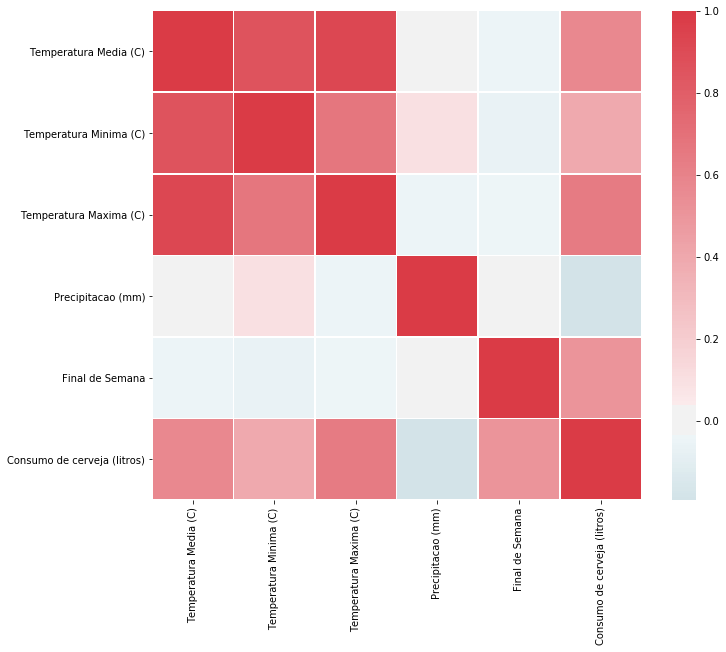

In [38]:
# Mapa de calor para verifcar correlação entre as variáveis
# Conforme escala de cor, aparentemente a chuva não tem grande impacto se c
corr = cerveja.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr,  cmap=cmap, center=0,
            square=True, linewidths=.5)

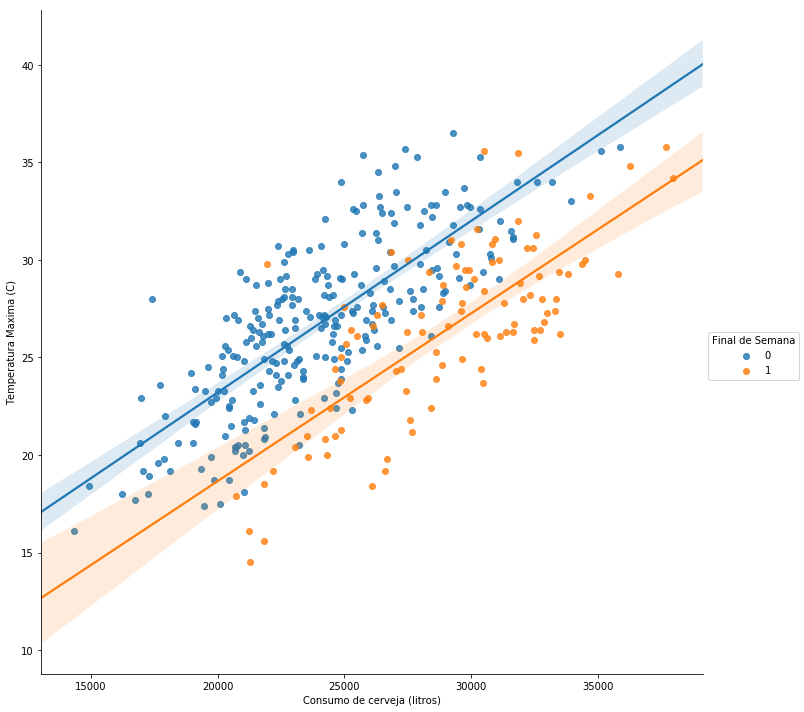

In [39]:
sns.lmplot(x="Consumo de cerveja (litros)", y="Temperatura Maxima (C)", data=cerveja, size=10, hue="Final de Semana")

In [40]:
cerveja["Mes"] = cerveja['Data'].apply(lambda time: time.month)

In [41]:
cerveja.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Mes
0,2015-01-01,27.30,23.9,32.5,0.0,0,25461,1
1,2015-01-02,27.02,24.5,33.5,0.0,0,28972,1
2,2015-01-03,24.82,22.4,29.9,0.0,1,30814,1
3,2015-01-04,23.98,21.5,28.6,1.2,1,29799,1
4,2015-01-05,23.82,21.0,28.3,0.0,0,28900,1


In [42]:
#Criando uma nova coluna de dia de semana para explorar mais os dados
dmap = {0:'Segunda',1:'Terca',2:'Quarta',3:'Quinta',4:'Sexta',5:'Sabado',6:'Domingo'}
cerveja['Dia_semana'] = cerveja['Data'].apply(lambda time: time.dayofweek)
cerveja['Dia_semana'] = cerveja['Dia_semana'].map(dmap)

In [43]:
cerveja.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Mes,Dia_semana
0,2015-01-01,27.30,23.9,32.5,0.0,0,25461,1,Quinta
1,2015-01-02,27.02,24.5,33.5,0.0,0,28972,1,Sexta
2,2015-01-03,24.82,22.4,29.9,0.0,1,30814,1,Sabado
3,2015-01-04,23.98,21.5,28.6,1.2,1,29799,1,Domingo
4,2015-01-05,23.82,21.0,28.3,0.0,0,28900,1,Segunda


In [44]:
d_semana = cerveja.groupby("Consumo de cerveja (litros)")["Dia_semana"].sum()

In [45]:
d_semana = pd.DataFrame(d_semana)
d_semana.reset_index(inplace=True)

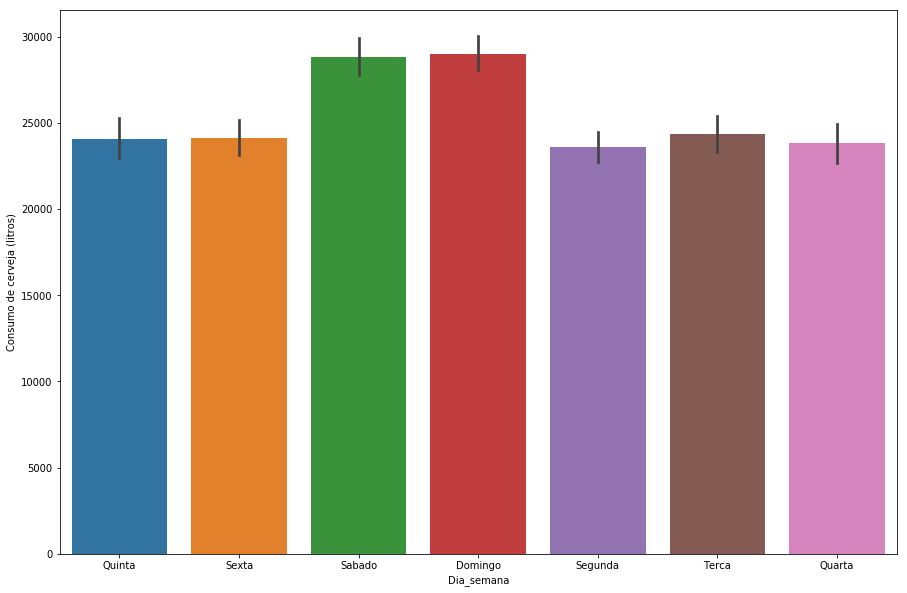

In [46]:
# Ao visualizar os dados por dias da semana, fica nítido o aumento do consumo durante o final de semana (Sabado e Domingo)
# Para os demais dias, não houve variação expressiva, ou seja, não haverá necessidade de utilizar os dias da semana para o modelo
# pois a coluna Final de Semana já terá a informação consiste para o modelo (0, 1)
f, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x="Dia_semana", y="Consumo de cerveja (litros)", data=cerveja)

In [47]:
cerveja.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Mes,Dia_semana
0,2015-01-01,27.30,23.9,32.5,0.0,0,25461,1,Quinta
1,2015-01-02,27.02,24.5,33.5,0.0,0,28972,1,Sexta
2,2015-01-03,24.82,22.4,29.9,0.0,1,30814,1,Sabado
3,2015-01-04,23.98,21.5,28.6,1.2,1,29799,1,Domingo
4,2015-01-05,23.82,21.0,28.3,0.0,0,28900,1,Segunda


In [54]:
# Importando novamento o Dataset, porém gravando em outra variável para criar o modelo de predição.
ml = pd.read_excel("Cerveja_Multicolinearidade.xlsx")
ml.drop("Data", axis=1, inplace=True)
ml.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,27.30,23.9,32.5,0.0,0,25461
1,27.02,24.5,33.5,0.0,0,28972
2,24.82,22.4,29.9,0.0,1,30814
3,23.98,21.5,28.6,1.2,1,29799
4,23.82,21.0,28.3,0.0,0,28900


In [55]:
# Separando os dados em atributos e target.
previsores = ml.iloc[:, 2:5]
classe = ml.iloc[:, 5]


In [56]:
# Diminuindo os valores entre as variáreis aplicando a função de escala do SKlearn
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)


In [57]:
# Criando as bases de testes e treino
from sklearn.cross_validation import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(
    previsores, classe, test_size=0.25, random_state=0)

In [58]:
# Taxa de acerto de 73% para o modelo
linear = linear_model.LinearRegression()
linear.fit(previsores_treinamento, classe_treinamento)
linear.score(previsores_treinamento, classe_treinamento)


0.73749535022759

In [59]:
# Valor de intercet de 25.288
# Coletando os coeficientes
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)

# Previsões
valores_previstos = linear.predict(previsores_teste)

Coefficient: 
 [2840.64217369 -747.87324564 2328.77258739]
Intercept: 
 25318.34656907745


In [61]:
! PIP install wkhtmltopdf

  Running setup.py bdist_wheel for wkhtmltopdf: started
  Running setup.py bdist_wheel for wkhtmltopdf: finished with status 'done'
  Stored in directory: C:\Users\alexandre.lustosa\AppData\Local\pip\Cache\wheels\a3\a6\7a\1b2bc71e081adcf412eb9ce8849e1c21de75a52902f48eb89e
Successfully built wkhtmltopdf


You are using pip version 9.0.1, however version 10.0.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
